In [1]:
#importing packages 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [2]:
#Removing the missing values from the data set
#these thing we have to dso when our data set is high and our missing values or 1 % to 5%
#then only we have to use the technique
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")


In [3]:
#top head values in the data set
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#seeing the missing values from the data set
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#seeing  the percentage of the missing values from the data set
df.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Value Percentage')

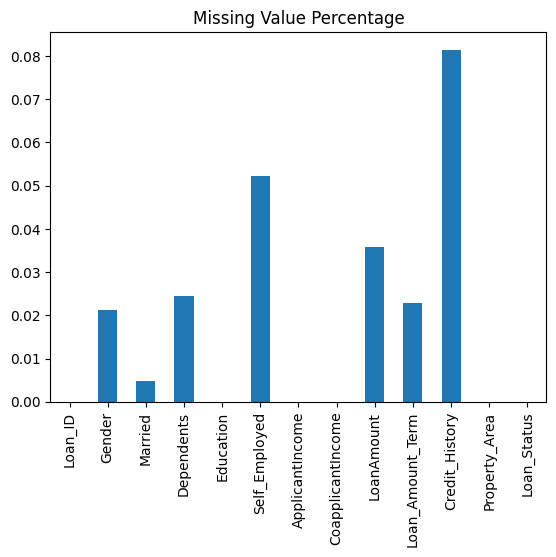

In [6]:
df.isna().mean().plot.bar()
plt.title('Missing Value Percentage')


In [7]:
#now checking the shape of the data set
df.shape

(614, 13)

In [8]:
df1=df.dropna()

In [9]:
df1.shape

(480, 13)

In [10]:
#the shape of the new data set is 480 
print(df.shape[0]-df1.shape[0])

134


In [11]:
#the number of tghe missing values in the data set is 134

In [12]:
#Now lets check the another moethod of handling missing values in tthe data set
#in these we will impute the missing data using mean and median 



In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df[df['LoanAmount'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [15]:
import warnings 
warnings.filterwarnings("ignore")

<Axes: xlabel='LoanAmount', ylabel='Density'>

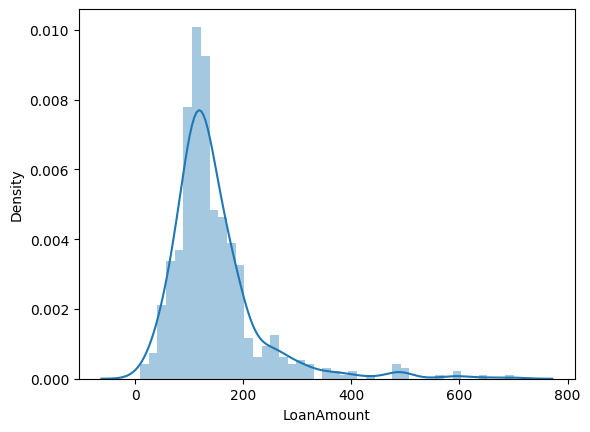

In [16]:
#from the above thing we can say that null value are randomly distributed
sns.distplot(df['LoanAmount'])

In [17]:
#since the distribution of the loan amount is folllowing the normal distribution we can use mean imputing otherwise median imputing 


In [18]:
mean_imputer=SimpleImputer(strategy="mean")


In [19]:
df['LoanAmount']=mean_imputer.fit_transform(df['LoanAmount'].to_frame())

In [20]:
#using the feature engine instead of sklearn
!pip install feature-engine

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
from feature_engine.imputation import MeanMedianImputer

In [24]:
md=MeanMedianImputer(imputation_method="median")

In [25]:
gh=md.fit_transform(df['Loan_Amount_Term'].to_frame())

In [26]:
gh['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
#let us take another method 
#Handling missing values using using Arbitory value

In [28]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
imp=SimpleImputer(strategy="constant",fill_value=99)

In [31]:
imp.fit_transform(df['Loan_Amount_Term'].to_frame())[0:5]

array([[360.],
       [360.],
       [360.],
       [360.],
       [360.]])

In [32]:
#EndTail Imputer using feature engine library 
from feature_engine.imputation import EndTailImputer

In [33]:
end=EndTailImputer()

In [34]:
end.fit_transform(df['Loan_Amount_Term'].to_frame())[0:10]

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
5,360.0
6,360.0
7,360.0
8,360.0
9,360.0


In [35]:
#Random Sampling imputer 
from feature_engine.imputation import RandomSampleImputer

In [36]:
df1=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [37]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
x=df1.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
rand=RandomSampleImputer()
x_train=rand.fit_transform(x_train)

In [41]:
#Bespoke imputation 
#in these imputation technique we wiil fill the nan values with "missing string" in the data set
#this is only useful for handling the missing values in categorical variables 
df2=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")


In [42]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [44]:
#first we wiill separate the categorical variables and handle the missing values in it
cat=df2.select_dtypes(exclude=np.number)

In [45]:
cat.isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [46]:
sm=SimpleImputer(strategy="constant",fill_value="Missing")

In [47]:
cat1=pd.DataFrame(sm.fit_transform(cat),columns=cat.columns)

In [48]:
cat1.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [54]:
from sklearn.impute import MissingIndicator

In [55]:
miss=MissingIndicator()

In [56]:
X=df2.drop("Loan_Status",axis=1)
Y=df2["Loan_Status"]

In [57]:
X1=miss.fit_transform(X)

In [62]:
X1.ndim

2

In [63]:
data=pd.DataFrame(X1)

In [64]:
data.head()

,0,1,2,3,4,5,6
0,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
